# New Section

## Deep Learning Model

### Importnig

In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

from tensorflow.keras.datasets import mnist


### Loading the Data

In [375]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [376]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

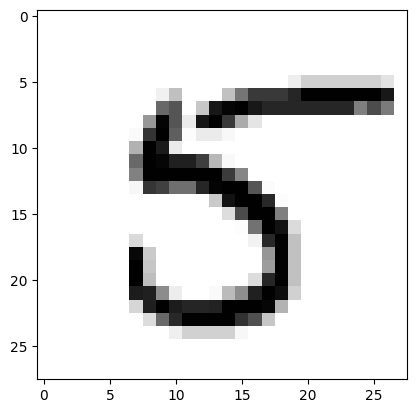

In [377]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()

In [378]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [379]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)


In [380]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

### Building the Neural Network Model

In [381]:
model = Sequential([
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Training and Evaluating the Model

In [382]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [383]:
model_trained = model.fit(X_train, y_train, validation_split = 0.2, epochs=20, callbacks=[early_stopping])

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8067 - loss: 1.6053 - val_accuracy: 0.8895 - val_loss: 0.7284
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8937 - loss: 0.7129 - val_accuracy: 0.9120 - val_loss: 0.6185
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9084 - loss: 0.6204 - val_accuracy: 0.9167 - val_loss: 0.5626
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9185 - loss: 0.5605 - val_accuracy: 0.9232 - val_loss: 0.5230
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9192 - loss: 0.5274 - val_accuracy: 0.9304 - val_loss: 0.4845
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9254 - loss: 0.4914 - val_accuracy: 0.9327 - val_loss: 0.4613
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9326 - loss: 0.4679 - val_accuracy: 0.9239 - val_loss: 0.4622
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9318 - loss: 0.4508 - 

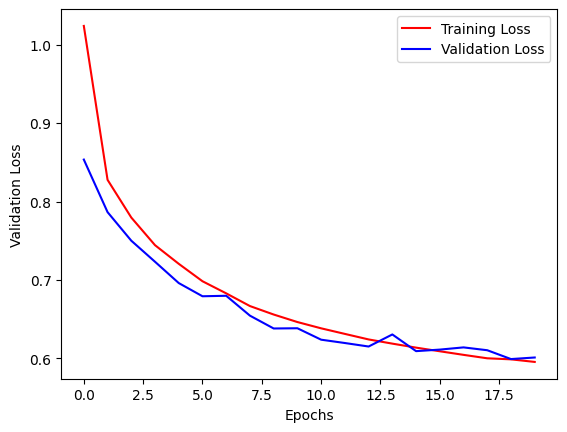

In [384]:
plt.plot(np.sqrt(model_trained.history['loss']), 'r', label='Training Loss')
plt.plot(np.sqrt(model_trained.history['val_loss']), 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()

In [385]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9379 - loss: 0.3809
0.3531678020954132 0.9470000267028809
